# <font color = "blue"> Task 2 </font>- Customer Segmentation Analysis

# <font color = "red">Problem Statement </font>

#### You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

## Importing the data 

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
82,83,Male,67,54,41
37,38,Female,30,34,73
115,116,Female,19,65,50
19,20,Female,35,23,98
0,1,Male,19,15,39


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking for null values

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Creating  a copy of the dataset

In [9]:
df1 = df.copy()

## Dropping the column CustomerID since it is not required for our prediction

In [10]:
df1.drop(columns="CustomerID", axis = 1, inplace = True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## Renameing the columns for our convinience

In [12]:
df1 = df1.rename(columns={'Annual Income (k$)' : 'Annual_income',
                 'Spending Score (1-100)' : 'Spending_score'})

## Understanding and Visualizing Data

In [13]:
corr = df1.corr()
corr

,Age,Annual_income,Spending_score
Age,1.000000,-0.012398,-0.327227
Annual_income,-0.012398,1.000000,0.009903
Spending_score,-0.327227,0.009903,1.000000


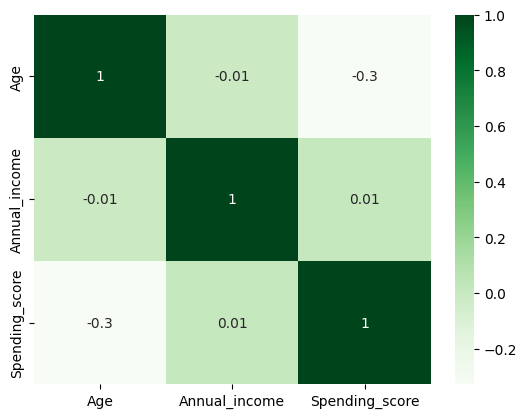

In [14]:
sns.heatmap(corr,annot=True,cmap='Greens',fmt='.1g')
plt.show()

### Gender Data Visualization

In [15]:
df1['Gender'].dtype

dtype('O')

In [16]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df1['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
labels=df1['Gender'].unique()
values=df1['Gender'].value_counts(ascending=True)

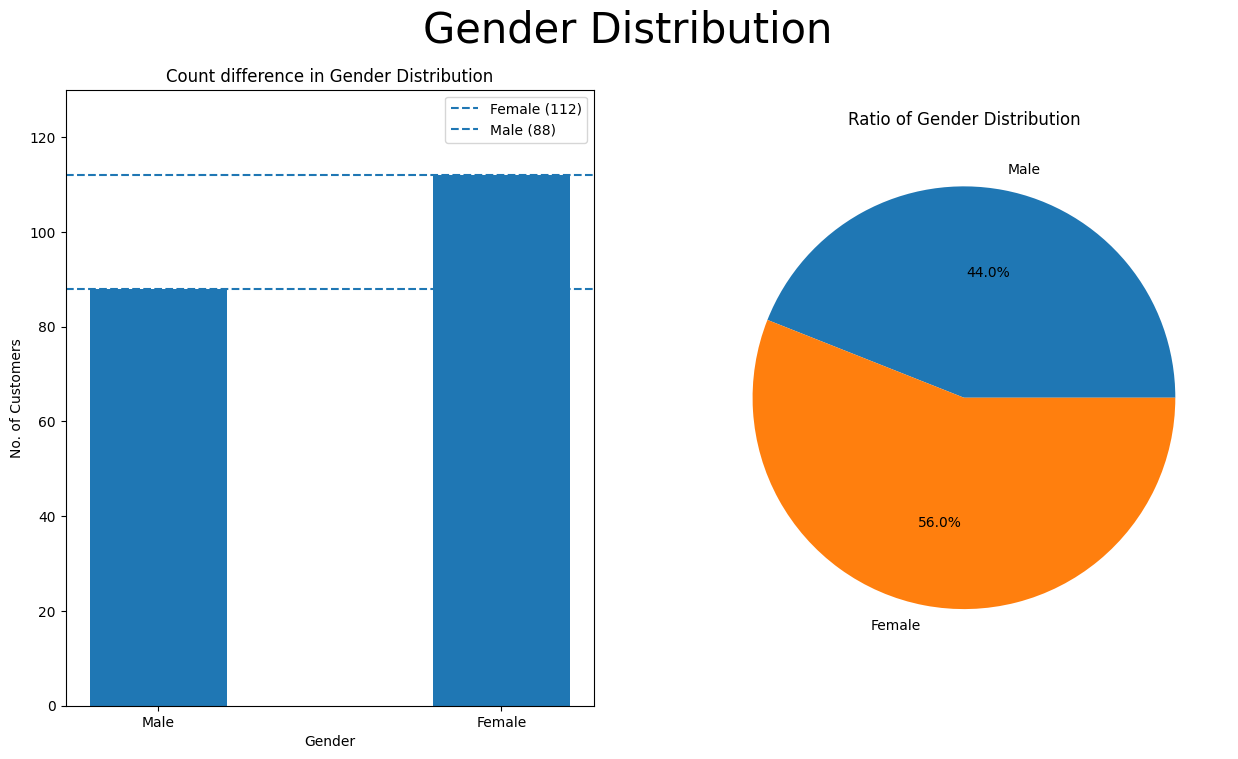

In [19]:


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center')
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=df1['Gender'].value_counts()[0], linestyle='--', label=f'Female ({df1.Gender.value_counts()[0]})')
ax0.axhline(y=df1['Gender'].value_counts()[1], linestyle='--', label=f'Male ({df1.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

### Age Data Visualization

In [20]:
df1['Age'].dtype

dtype('int64')

In [21]:
df1['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [22]:
df1['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

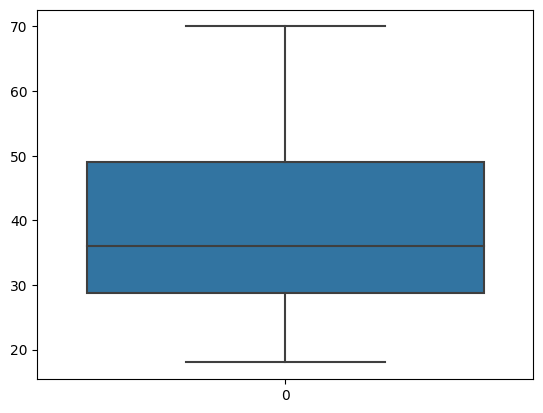

In [23]:
sns.boxplot(df1['Age'])
plt.show()

In [24]:
df1['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

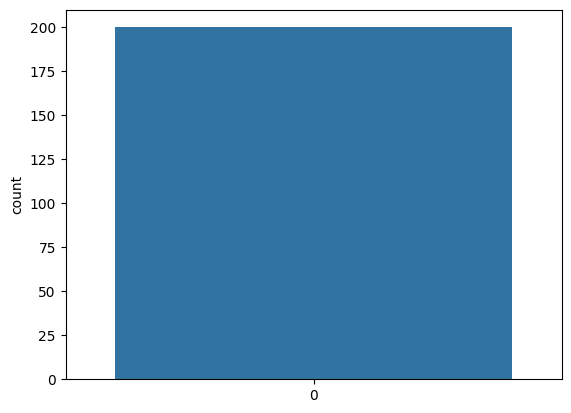

In [25]:
sns.countplot([df['Age']])
plt.show()

### Gender wise Age Distribution

In [26]:
df1[df1['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [27]:
df1[df1['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

In [28]:
data_male = df1[df1['Gender']=='Male']['Age'].describe()
data_female = df1[df1['Gender']=='Female']['Age'].describe()

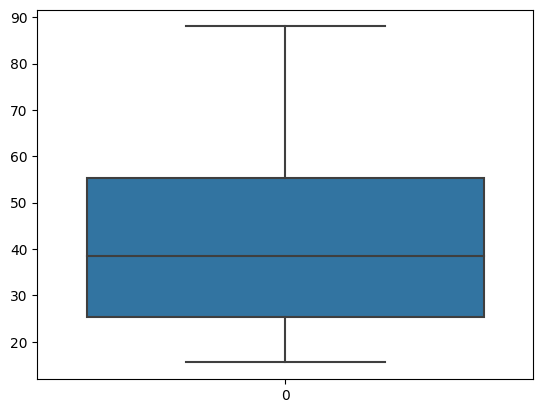

In [29]:
sns.boxplot(data_male)
plt.show()

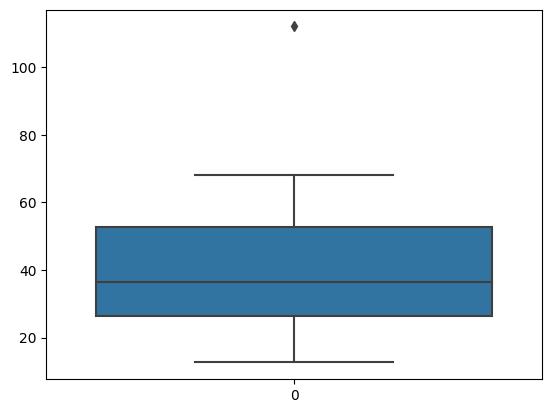

In [30]:
sns.boxplot(data_female)
plt.show()

Average Age of Male Customers.

In [31]:
df1[df1['Gender']=='Male'].Age.mean()

39.80681818181818

Count of first five max age counts in the Male Customers.

In [32]:
df1[df1['Gender']=='Male'].Age.value_counts().head()

19    6
32    5
48    5
59    4
28    3
Name: Age, dtype: int64

Average Age of Female Customers

In [33]:
df1[df1['Gender']=='Female'].Age.mean()

38.098214285714285

 Counts of first five max age count in the Female Customers.

In [34]:
df1[df1['Gender']=='Female'].Age.value_counts().head()

31    7
23    6
49    6
32    6
35    6
Name: Age, dtype: int64

## Analyzing Data  for Modelling

### Analyzing Annual Income data

In [35]:
df1['Annual_income'].dtype

dtype('int64')

In [36]:
df1['Annual_income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_income, dtype: float64

Visualizing statistical data about Annual Income column on a boxplot.

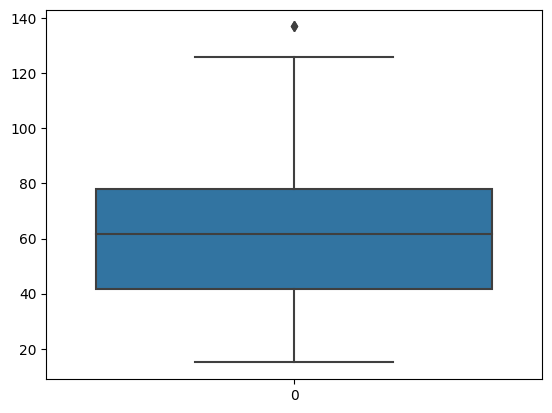

In [37]:
sns.boxplot(df1['Annual_income'])
plt.show()

In [38]:
df1['Annual_income'].value_counts().head()

54    12
78    12
48     6
71     6
63     6
Name: Annual_income, dtype: int64

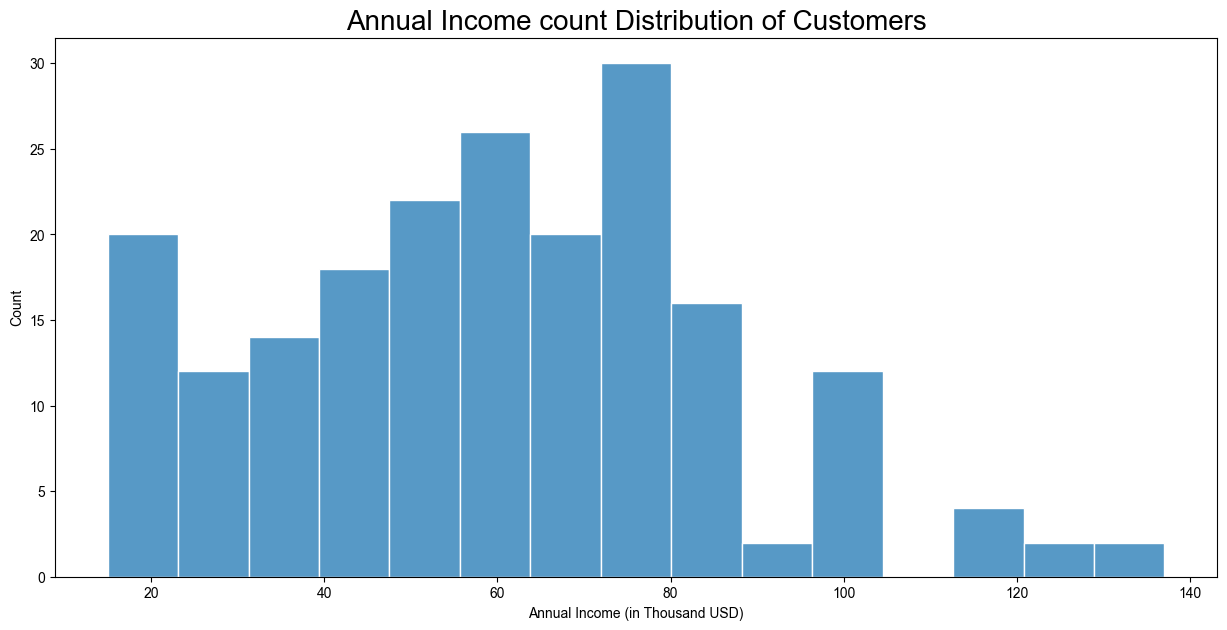

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(df1['Annual_income'], bins=15, ax=ax)
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

Visualizing Annual Income per Age on a Scatterplot.

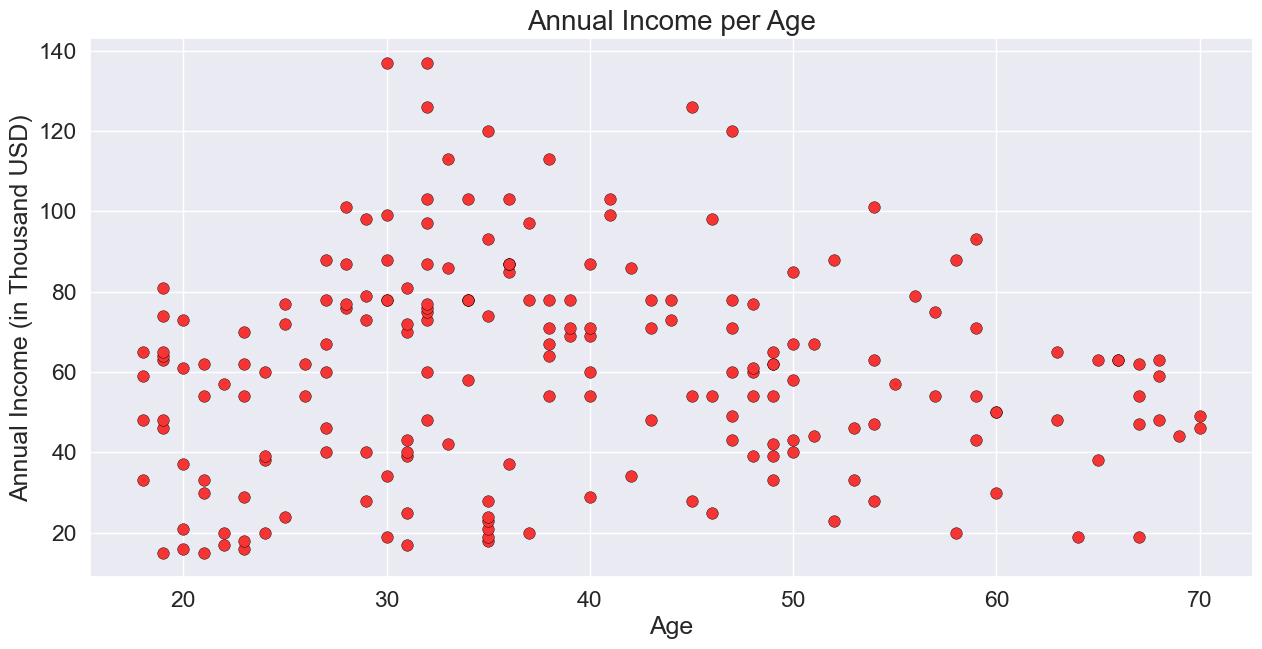

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df1['Annual_income'], x=df1['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

### Annual Income per Gender.

Statistical data about the Annual Income of male customer.

In [41]:
df1[df1['Gender']=='Male'].Annual_income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_income, dtype: float64

Statistical data about the Annual Income of female customer.

In [42]:
df1[df1['Gender']=='Female'].Annual_income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_income, dtype: float64

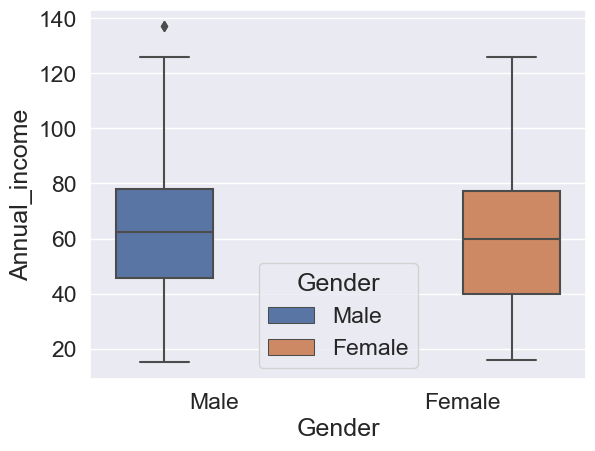

In [43]:
sns.boxplot(x=df1['Gender'], y=df1["Annual_income"], hue=df1['Gender'])
plt.show()

## Analyzing Spending Score data

In [44]:
df1['Spending_score'].dtype

dtype('int64')

In [45]:
df1['Spending_score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_score, dtype: float64

Visualizing statistical data about Spending score column on a boxplot.

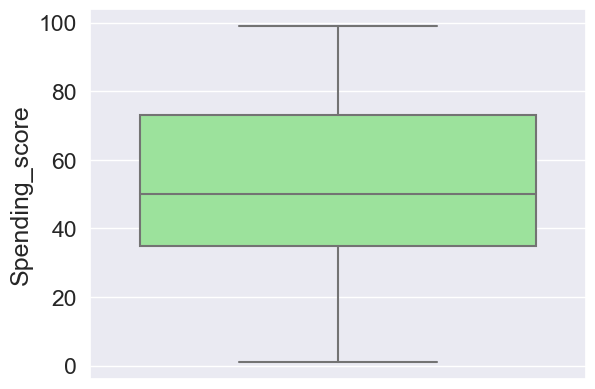

In [46]:
sns.boxplot(y=df1['Spending_score'],color = 'lightgreen')
plt.show()

### Spending Scores per Gender

Statistical data of Spending Score of male customer.

In [47]:
df1[df1['Gender']=='Male'].Annual_income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_income, dtype: float64

Statistical data of Spending Score of female customer

In [48]:
df1[df1['Gender']=='Female'].Annual_income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_income, dtype: float64

Visualizing statistical difference of Spending Score between Male and Female Customers.

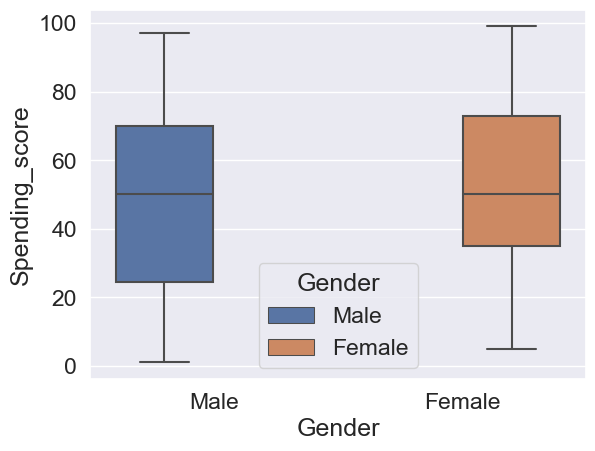

In [49]:
sns.boxplot(x=df1['Gender'], y=df1["Spending_score"], hue=df1['Gender'])
plt.show()

## K - Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

First we need to check the data for any missing values as it can ruin our model.



In [50]:
df1.isna().sum()

Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

We will now view and select the data that we need for clustering.

In [51]:
df1.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [52]:
clustering_data = df1.iloc[:,[2,3]]
clustering_data.head()

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Determining No. of Clusters Required

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.


In [53]:
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30227.60651315,  25062.43379265,
        21850.16528259,  19634.55462935,  17553.82958735,  15968.16609528,
        14499.80220466,  13003.92899478,  12048.56424409,  11004.34455863,
        10233.34333031,   9433.11815083,   8954.53967761,   8105.59465148,
         7668.74884135,   7310.6782044 ,   6847.29764571,   6428.16461005,
         6023.9462482 ,   5736.94878539,   5356.64891741,   5153.22972583,
         4845.50681818])

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

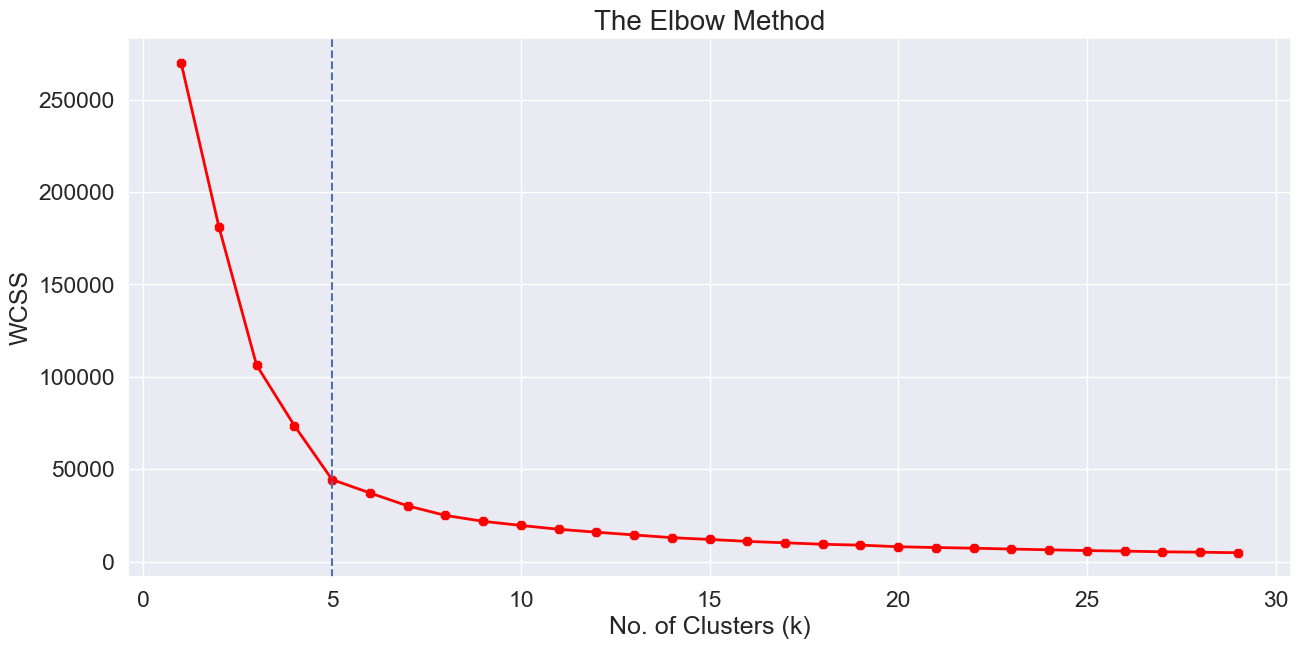

In [54]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

**It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.**

## Clustering

 Now we will build the model for creating clusters from the dataset.
We will use `n_clusters = 5` i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

 Our data set is for  unsupervised learning therefore we will use `fit_predict()`
Suppose we were working with  supervised learning data set we would use `fit_tranform()`

In [55]:
kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [56]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_income,Spending_score,Cluster_Prediction
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


 We can also get the centroids of the clusters by the `cluster_centers_` attribute of KMeans algorithm.

In [57]:
kms.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

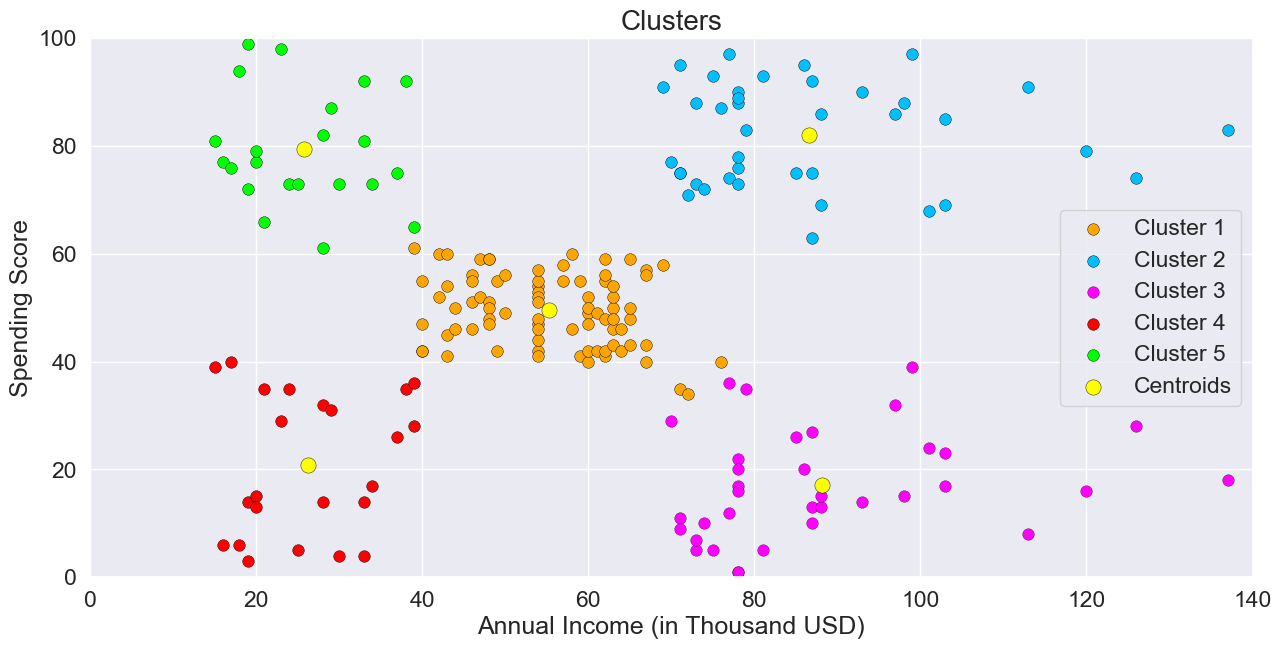

In [58]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

## Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the 
data.
Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model, 
1. Cluster Orange
1. Cluster Blue
1. Cluster Purple
1. Cluster Red
1. Cluster Green

**Cluster Orange - Balanced Customers :**

    They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
    

**Cluster Blue - Pinch Penny Customers :**

    Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.
    

**Cluster Purple - Normal Customer :**

    Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
    

**Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
    

**Cluster Green - Target Customers :**

    Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.